In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('./Dataset/Bandung_Andir.csv')

In [3]:
df

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,pressure_msl,surface_pressure,precipitation,rain,snowfall,...,et0_fao_evapotranspiration,vapor_pressure_deficit,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,1264953600,21.0,99,20.8,25.2,1014.7,924.6,0.1,0.1,0.0,...,0.00,0.02,21.7,22.9,23.5,24.0,0.415,0.427,0.433,0.428
1,1264957200,20.9,97,20.4,24.8,1014.2,924.1,0.6,0.6,0.0,...,0.00,0.07,21.6,22.8,23.5,24.0,0.419,0.420,0.432,0.429
2,1264960800,20.6,98,20.3,24.5,1013.7,923.6,0.6,0.6,0.0,...,0.00,0.04,21.5,22.8,23.5,24.0,0.423,0.418,0.432,0.429
3,1264964400,20.8,97,20.4,24.8,1013.2,923.2,0.0,0.0,0.0,...,0.00,0.07,21.5,22.7,23.5,24.0,0.425,0.420,0.431,0.429
4,1264968000,20.8,97,20.3,24.6,1012.9,922.9,0.0,0.0,0.0,...,0.00,0.07,21.4,22.6,23.5,24.0,0.428,0.420,0.431,0.429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115603,1681124400,23.1,90,21.4,27.0,1011.7,922.5,0.0,0.0,0.0,...,0.03,0.28,23.9,24.4,23.8,23.4,0.406,0.389,0.375,0.419
115604,1681128000,22.2,93,21.0,26.2,1012.5,922.9,0.0,0.0,0.0,...,0.00,0.19,23.2,24.3,23.8,23.4,0.404,0.390,0.375,0.419
115605,1681131600,21.7,95,20.8,25.5,1013.4,923.6,0.0,0.0,0.0,...,0.00,0.14,22.8,24.2,23.8,23.4,0.402,0.390,0.375,0.419
115606,1681135200,21.3,95,20.6,25.1,1013.8,923.9,0.0,0.0,0.0,...,0.00,0.11,22.5,24.1,23.8,23.4,0.401,0.390,0.375,0.419


In [4]:
import pytz
from datetime import datetime

tz = pytz.timezone('Asia/Singapore')
time_iso = []
for times in df['time']:
    time_iso.append(datetime.fromtimestamp(times, tz).isoformat())

df['time'] = time_iso
df.index = pd.to_datetime(df['time'], format = '%Y-%m-%dT%H:%M:00+08:00')

In [5]:
main_cols = ['temperature_2m', 'relativehumidity_2m',
             'apparent_temperature','precipitation', 
             'rain','cloudcover','shortwave_radiation',
             'direct_radiation', 'diffuse_radiation',
             'direct_normal_irradiance']


main_df = df[main_cols]

In [6]:
main_df['seconds'] = main_df.index.map(pd.Timestamp.timestamp)

C:\Users\Kevin Putra Santoso\AppData\Local\Temp\ipykernel_3184\4258243543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['seconds'] = main_df.index.map(pd.Timestamp.timestamp)


In [7]:
day =  60*60*24
year = 365.2425*day

main_df['sin(day)'] = np.sin(main_df['seconds'] * (2*np.pi/day))
main_df['cos(day)'] = np.cos(main_df['seconds'] * (2*np.pi/day))
main_df['sin(year)'] = np.sin(main_df['seconds'] * (2*np.pi/year))
main_df['cos(year)'] = np.cos(main_df['seconds'] * (2*np.pi/year))

main_df.drop(columns='seconds', inplace=True)

C:\Users\Kevin Putra Santoso\AppData\Local\Temp\ipykernel_3184\3666374661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['sin(day)'] = np.sin(main_df['seconds'] * (2*np.pi/day))
C:\Users\Kevin Putra Santoso\AppData\Local\Temp\ipykernel_3184\3666374661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['cos(day)'] = np.cos(main_df['seconds'] * (2*np.pi/day))
C:\Users\Kevin Putra Santoso\AppData\Local\Temp\ipykernel_3184\3666374661.py:6: SettingWithCopyWarning: 
A value is trying to be s

In [8]:
main_df

,temperature_2m,relativehumidity_2m,apparent_temperature,precipitation,rain,cloudcover,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,sin(day),cos(day),sin(year),cos(year)
time,,,,,,,,,,,,,,
2010-02-01 00:00:00,21.0,99,25.2,0.1,0.1,100,0.0,0.0,0.0,0.0,-2.129398e-12,1.000000,0.512803,0.858506
2010-02-01 01:00:00,20.9,97,24.8,0.6,0.6,100,0.0,0.0,0.0,0.0,2.588190e-01,0.965926,0.513419,0.858138
2010-02-01 02:00:00,20.6,98,24.5,0.6,0.6,100,0.0,0.0,0.0,0.0,5.000000e-01,0.866025,0.514033,0.857770
2010-02-01 03:00:00,20.8,97,24.8,0.0,0.0,100,0.0,0.0,0.0,0.0,7.071068e-01,0.707107,0.514648,0.857401
2010-02-01 04:00:00,20.8,97,24.6,0.0,0.0,100,0.0,0.0,0.0,0.0,8.660254e-01,0.500000,0.515263,0.857032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 19:00:00,23.1,90,27.0,0.0,0.0,63,30.0,5.0,25.0,35.4,-9.659258e-01,0.258819,0.989004,-0.147890
2023-04-10 20:00:00,22.2,93,26.2,0.0,0.0,61,0.0,0.0,0.0,0.0,-8.660254e-01,0.500000,0.988897,-0.148599
2023-04-10 21:00:00,21.7,95,25.5,0.0,0.0,61,0.0,0.0,0.0,0.0,-7.071068e-01,0.707107,0.988791,-0.149308


In [9]:
def df_to_X_y(df, win_size = 7):
    df_as_np = df.to_numpy()
    X, y = [], []

    for i in range(len(df_as_np) - win_size):
        row = [x for x in df_as_np[i:i+win_size]]
        X.append(row)
        label = [df_as_np[i+win_size][0], df_as_np[i+win_size][1],
                 df_as_np[i+win_size][2], df_as_np[i+win_size][3],
                 df_as_np[i+win_size][4], df_as_np[i+win_size][5],
                 df_as_np[i+win_size][6], df_as_np[i+win_size][7],
                 df_as_np[i+win_size][8], df_as_np[i+win_size][9]]
        y.append(label)
    
    return np.array(X), np.array(y)


In [10]:
X, y = df_to_X_y(main_df)

In [11]:
print(X.shape, y.shape)

(115601, 7, 14) (115601, 10)


In [12]:
X_train, y_train = X[:70000], y[:70000]
X_val, y_val = X[70000:80000], y[70000:80000]
X_test, y_test = X[80000:], y[80000:]

In [13]:
means_list = []
stds_list = []

for i in range(10):
  means_list.append(np.mean(X_train[:, :, i]))
  stds_list.append(np.std(X_train[:, :, i]))

def preprocess(X):
  for i in range(10):
    X[:, :, i] = (X[:, :, i] - means_list[i]) / stds_list[i]

def preprocess_output(y):
  for i in range(10):
    y[:, i] = (y[:, i] - means_list[i]) / stds_list[i]

In [14]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

In [15]:
model = Sequential()
model.add(InputLayer((7,14)))
model.add(LSTM(128)) #64
model.add(Dense(16, 'relu'))
model.add(Dense(10, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               73216     
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 75,450
Trainable params: 75,450
Non-trainable params: 0
_________________________________________________________________


In [16]:
checkpoint = ModelCheckpoint('model/', save_best_only=True)
model.compile(
    loss=MeanSquaredError(), 
    optimizer=Adam(learning_rate=0.0001), 
    metrics=[RootMeanSquaredError()])

In [17]:
model.fit(X_train, y_train, 
          validation_data = (X_val, y_val), 
          epochs=30, 
          callbacks=[checkpoint])

Epoch 1/30
2187/2188 [============================>.] - ETA: 0s - loss: 0.2707 - root_mean_squared_error: 0.5203

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 61s 22ms/step - loss: 0.2707 - root_mean_squared_error: 0.5203 - val_loss: 0.1391 - val_root_mean_squared_error: 0.3730
Epoch 2/30
2185/2188 [============================>.] - ETA: 0s - loss: 0.1282 - root_mean_squared_error: 0.3580

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 43s 20ms/step - loss: 0.1282 - root_mean_squared_error: 0.3580 - val_loss: 0.1186 - val_root_mean_squared_error: 0.3444
Epoch 3/30
2188/2188 [==============================] - ETA: 0s - loss: 0.1170 - root_mean_squared_error: 0.3421

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 48s 22ms/step - loss: 0.1170 - root_mean_squared_error: 0.3421 - val_loss: 0.1134 - val_root_mean_squared_error: 0.3367
Epoch 4/30
2186/2188 [============================>.] - ETA: 0s - loss: 0.1127 - root_mean_squared_error: 0.3358

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 44s 20ms/step - loss: 0.1128 - root_mean_squared_error: 0.3358 - val_loss: 0.1101 - val_root_mean_squared_error: 0.3318
Epoch 5/30
2185/2188 [============================>.] - ETA: 0s - loss: 0.1104 - root_mean_squared_error: 0.3323

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 47s 22ms/step - loss: 0.1105 - root_mean_squared_error: 0.3323 - val_loss: 0.1088 - val_root_mean_squared_error: 0.3298
Epoch 6/30
2188/2188 [==============================] - 39s 18ms/step - loss: 0.1088 - root_mean_squared_error: 0.3298 - val_loss: 0.1094 - val_root_mean_squared_error: 0.3308
Epoch 7/30
2188/2188 [==============================] - ETA: 0s - loss: 0.1074 - root_mean_squared_error: 0.3278

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 42s 19ms/step - loss: 0.1074 - root_mean_squared_error: 0.3278 - val_loss: 0.1073 - val_root_mean_squared_error: 0.3276
Epoch 8/30
2186/2188 [============================>.] - ETA: 0s - loss: 0.1066 - root_mean_squared_error: 0.3264

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 46s 21ms/step - loss: 0.1065 - root_mean_squared_error: 0.3264 - val_loss: 0.1068 - val_root_mean_squared_error: 0.3268
Epoch 9/30
2187/2188 [============================>.] - ETA: 0s - loss: 0.1057 - root_mean_squared_error: 0.3251

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 48s 22ms/step - loss: 0.1057 - root_mean_squared_error: 0.3251 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3245
Epoch 10/30
2188/2188 [==============================] - 41s 19ms/step - loss: 0.1052 - root_mean_squared_error: 0.3243 - val_loss: 0.1056 - val_root_mean_squared_error: 0.3249
Epoch 11/30
2188/2188 [==============================] - 38s 17ms/step - loss: 0.1044 - root_mean_squared_error: 0.3232 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3246
Epoch 12/30
2187/2188 [============================>.] - ETA: 0s - loss: 0.1040 - root_mean_squared_error: 0.3225

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 46s 21ms/step - loss: 0.1040 - root_mean_squared_error: 0.3225 - val_loss: 0.1044 - val_root_mean_squared_error: 0.3230
Epoch 13/30
2188/2188 [==============================] - 40s 18ms/step - loss: 0.1037 - root_mean_squared_error: 0.3220 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3245
Epoch 14/30
2188/2188 [==============================] - ETA: 0s - loss: 0.1033 - root_mean_squared_error: 0.3213

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 49s 22ms/step - loss: 0.1033 - root_mean_squared_error: 0.3213 - val_loss: 0.1042 - val_root_mean_squared_error: 0.3227
Epoch 15/30
2186/2188 [============================>.] - ETA: 0s - loss: 0.1029 - root_mean_squared_error: 0.3207

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 43s 20ms/step - loss: 0.1028 - root_mean_squared_error: 0.3207 - val_loss: 0.1036 - val_root_mean_squared_error: 0.3219
Epoch 16/30
2188/2188 [==============================] - 39s 18ms/step - loss: 0.1024 - root_mean_squared_error: 0.3201 - val_loss: 0.1038 - val_root_mean_squared_error: 0.3222
Epoch 17/30
2188/2188 [==============================] - 39s 18ms/step - loss: 0.1021 - root_mean_squared_error: 0.3195 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3244
Epoch 18/30
2187/2188 [============================>.] - ETA: 0s - loss: 0.1018 - root_mean_squared_error: 0.3191

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 43s 20ms/step - loss: 0.1018 - root_mean_squared_error: 0.3191 - val_loss: 0.1032 - val_root_mean_squared_error: 0.3212
Epoch 19/30
2188/2188 [==============================] - 31s 14ms/step - loss: 0.1016 - root_mean_squared_error: 0.3188 - val_loss: 0.1035 - val_root_mean_squared_error: 0.3218
Epoch 20/30
2188/2188 [==============================] - 28s 13ms/step - loss: 0.1012 - root_mean_squared_error: 0.3181 - val_loss: 0.1034 - val_root_mean_squared_error: 0.3215
Epoch 21/30
2184/2188 [============================>.] - ETA: 0s - loss: 0.1010 - root_mean_squared_error: 0.3178

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 32s 15ms/step - loss: 0.1010 - root_mean_squared_error: 0.3177 - val_loss: 0.1024 - val_root_mean_squared_error: 0.3201
Epoch 22/30
2188/2188 [==============================] - ETA: 0s - loss: 0.1007 - root_mean_squared_error: 0.3174

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 31s 14ms/step - loss: 0.1007 - root_mean_squared_error: 0.3174 - val_loss: 0.1023 - val_root_mean_squared_error: 0.3199
Epoch 23/30
2188/2188 [==============================] - ETA: 0s - loss: 0.1005 - root_mean_squared_error: 0.3170

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 33s 15ms/step - loss: 0.1005 - root_mean_squared_error: 0.3170 - val_loss: 0.1020 - val_root_mean_squared_error: 0.3194
Epoch 24/30
2188/2188 [==============================] - 25s 12ms/step - loss: 0.1004 - root_mean_squared_error: 0.3168 - val_loss: 0.1035 - val_root_mean_squared_error: 0.3217
Epoch 25/30
2188/2188 [==============================] - 28s 13ms/step - loss: 0.1001 - root_mean_squared_error: 0.3163 - val_loss: 0.1025 - val_root_mean_squared_error: 0.3202
Epoch 26/30
2188/2188 [==============================] - 29s 13ms/step - loss: 0.0997 - root_mean_squared_error: 0.3158 - val_loss: 0.1039 - val_root_mean_squared_error: 0.3223
Epoch 27/30
2188/2188 [==============================] - 30s 14ms/step - loss: 0.0996 - root_mean_squared_error: 0.3156 - val_loss: 0.1030 - val_root_mean_squared_error: 0.3210
Epoch 28/30
2188/2188 [==============================] - 30s 14ms/step - loss: 0.0994 - root_mean_squared_error: 0.3152 - val_l

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


2188/2188 [==============================] - 33s 15ms/step - loss: 0.0992 - root_mean_squared_error: 0.3150 - val_loss: 0.1017 - val_root_mean_squared_error: 0.3189
Epoch 30/30
2188/2188 [==============================] - 30s 14ms/step - loss: 0.0990 - root_mean_squared_error: 0.3146 - val_loss: 0.1027 - val_root_mean_squared_error: 0.3204


In [18]:
start_date = "2023-04-11 00:00:00"
end_date = "2025-04-10 23:00:00"
time = pd.date_range(start_date, end_date, freq="H")
pallete = pd.DataFrame(time, columns=['time'])

In [19]:
pallete.index = pd.to_datetime(pallete['time'], format='%Y-%m-%d %H:%M:%S')
pallete['seconds'] = pallete.index.map(pd.Timestamp.timestamp)

In [20]:
pallete.drop(columns='time', inplace=True)

pallete['sin(day)'] = np.sin(pallete['seconds'] * (2*np.pi/day))
pallete['cos(day)'] = np.cos(pallete['seconds'] * (2*np.pi/day))
pallete['sin(year)'] = np.sin(pallete['seconds'] * (2*np.pi/year))
pallete['cos(year)'] = np.cos(pallete['seconds'] * (2*np.pi/year))
pallete.drop(columns='seconds', inplace=True)

In [21]:
model.predict(X_test[-1:])

1/1 [==============================] - 0s 346ms/step


array([[-0.8091998 ,  0.7932632 , -0.68561393, -0.45243892, -0.472981  ,
         0.8212637 , -0.7235893 , -0.6269274 , -0.78713393, -0.6935775 ]],
      dtype=float32)

In [22]:
X_test[-1:]

array([[[ 4.81371207e-01, -4.57644500e-01,  8.03387279e-02,
         -1.36134393e-01, -1.36134393e-01,  2.98735629e-02,
          5.61248055e-01, -3.89938956e-02,  1.79928990e+00,
          5.08425091e-01, -8.66025404e-01, -5.00000000e-01,
          9.89319484e-01, -1.45763362e-01],
        [ 5.65782855e-01, -5.35894803e-01,  2.31961810e-01,
         -3.20677440e-01, -3.20677440e-01, -3.86664200e-01,
          2.98581667e-01, -2.91840016e-01,  1.58007175e+00,
         -1.68432226e-01, -9.65925826e-01, -2.58819045e-01,
          9.89214750e-01, -1.46472451e-01],
        [ 4.39165383e-01, -3.01143895e-01,  2.31961810e-01,
         -4.12948963e-01, -4.12948963e-01, -4.62398339e-01,
         -2.23152941e-01, -5.20832729e-01,  5.16863719e-01,
         -3.35797750e-01, -1.00000000e+00, -8.80881843e-13,
          9.89109507e-01, -1.47181465e-01],
        [ 5.93129645e-02,  3.24858527e-01,  1.94056040e-01,
         -4.12948963e-01, -4.12948963e-01, -4.62398339e-01,
         -6.11755270e-01, -5

In [27]:
def construct_lt_prediction(X, model, pallete):
    preds = []
    for i in range(300):
        latest_pred = model.predict(X[-1:])
        last_data = X[-1].tolist()
        new_pallete = [last_data[1:] + [[latest_pred[0][0], latest_pred[0][1], latest_pred[0][2], latest_pred[0][3], latest_pred[0][4], latest_pred[0][5], latest_pred[0][6], latest_pred[0][7], latest_pred[0][8], latest_pred[0][9], pallete[pallete.columns[0]][i], pallete[pallete.columns[1]][i], pallete[pallete.columns[2]][i], pallete[pallete.columns[3]][i]]]]
        X = np.array(X.tolist() + new_pallete)
        preds.append(latest_pred)
    
    return X, preds


In [28]:
X_pred_new, predictions = construct_lt_prediction(X_test, model, pallete)

1/1 [==============================] - 0s 63ms/step


In [41]:
prediction_arr = []

for i in range(len(predictions)):
    prediction_arr.append(predictions[i][0].tolist())

In [46]:
forecast_df = pd.DataFrame(prediction_arr, columns=main_df.columns[:-4])

In [59]:
forecast_df['time'] = pallete.reset_index()['time'][0:300]

In [60]:
forecast_df

,temperature_2m,relativehumidity_2m,apparent_temperature,precipitation,rain,cloudcover,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,time
0,-0.809200,0.793263,-0.685614,-0.452439,-0.472981,0.821264,-0.723589,-0.626927,-0.787134,-0.693578,2023-04-11 00:00:00
1,-0.921388,0.838384,-0.815580,-0.496341,-0.509899,0.652026,-0.726734,-0.621173,-0.775971,-0.715784,2023-04-11 01:00:00
2,-1.013789,0.866296,-0.941816,-0.510753,-0.513655,0.514230,-0.720554,-0.616745,-0.777662,-0.703061,2023-04-11 02:00:00
3,-1.084321,0.871372,-1.046301,-0.512949,-0.507011,0.384332,-0.715397,-0.609387,-0.778498,-0.685148,2023-04-11 03:00:00
4,-1.145591,0.863658,-1.138804,-0.516988,-0.501503,0.213932,-0.717511,-0.609236,-0.776856,-0.672796,2023-04-11 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
295,-1.115449,0.880291,-1.066786,-0.586090,-0.569202,-0.507209,-0.732681,-0.621888,-0.728234,-0.711107,2023-04-23 07:00:00
296,-0.489107,0.654959,-0.314036,-0.519360,-0.565690,-0.933787,-0.430337,-0.414551,-0.309559,-0.618429,2023-04-23 08:00:00
297,0.448872,-0.137590,0.594632,-0.493641,-0.506854,-1.804056,0.314813,0.306752,0.344042,0.780109,2023-04-23 09:00:00
298,0.961479,-0.564379,1.142070,-0.460001,-0.445649,-1.883944,1.115565,1.318170,0.586530,1.617336,2023-04-23 10:00:00


In [72]:
forecast_df = forecast_df.reset_index(drop=True)

In [74]:
forecast_df

,temperature_2m,relativehumidity_2m,apparent_temperature,precipitation,rain,cloudcover,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,time
0,-0.809200,0.793263,-0.685614,-0.452439,-0.472981,0.821264,-0.723589,-0.626927,-0.787134,-0.693578,2023-04-11 00:00:00
1,-0.921388,0.838384,-0.815580,-0.496341,-0.509899,0.652026,-0.726734,-0.621173,-0.775971,-0.715784,2023-04-11 01:00:00
2,-1.013789,0.866296,-0.941816,-0.510753,-0.513655,0.514230,-0.720554,-0.616745,-0.777662,-0.703061,2023-04-11 02:00:00
3,-1.084321,0.871372,-1.046301,-0.512949,-0.507011,0.384332,-0.715397,-0.609387,-0.778498,-0.685148,2023-04-11 03:00:00
4,-1.145591,0.863658,-1.138804,-0.516988,-0.501503,0.213932,-0.717511,-0.609236,-0.776856,-0.672796,2023-04-11 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
295,-1.115449,0.880291,-1.066786,-0.586090,-0.569202,-0.507209,-0.732681,-0.621888,-0.728234,-0.711107,2023-04-23 07:00:00
296,-0.489107,0.654959,-0.314036,-0.519360,-0.565690,-0.933787,-0.430337,-0.414551,-0.309559,-0.618429,2023-04-23 08:00:00
297,0.448872,-0.137590,0.594632,-0.493641,-0.506854,-1.804056,0.314813,0.306752,0.344042,0.780109,2023-04-23 09:00:00
298,0.961479,-0.564379,1.142070,-0.460001,-0.445649,-1.883944,1.115565,1.318170,0.586530,1.617336,2023-04-23 10:00:00


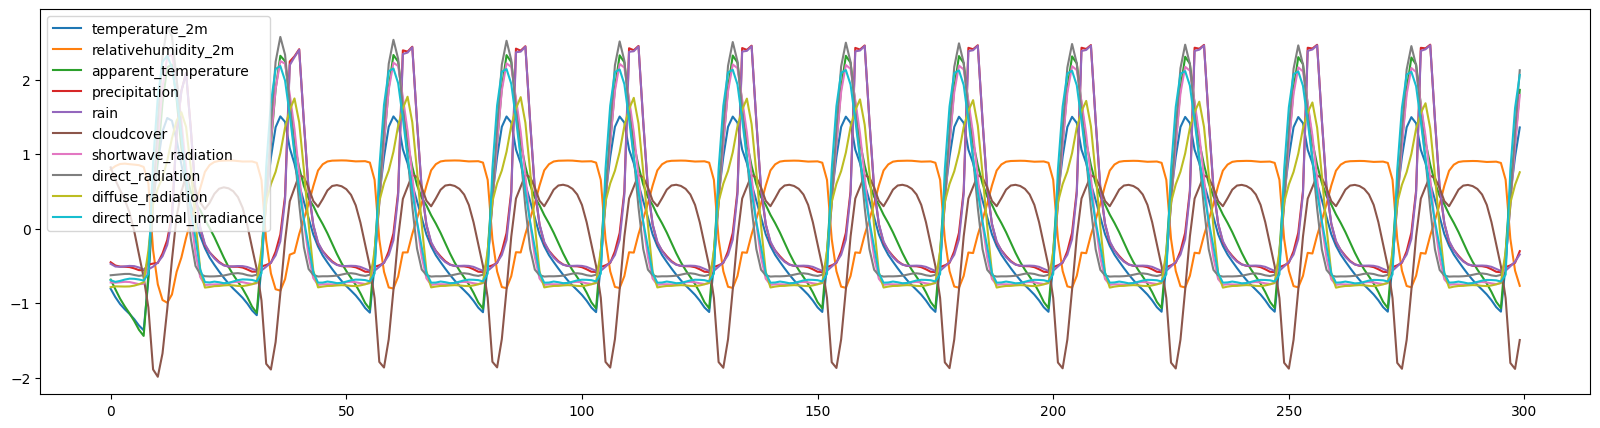

In [86]:
plt.figure(figsize=(20, 5))
plt.plot(forecast_df[forecast_df.columns[:-1]])
plt.legend(forecast_df.columns)